In [4]:
# Core Libraries
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

# Image Processing

import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Machine Learning & Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [6]:
# Data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data from folder
train_data = datagen.flow_from_directory(
    r'C:\Users\Nivedha\Downloads\Road Signs classification dataset-20250404T035044Z-001\Road Signs classification dataset\DATA',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# ✅ Load validation data from the SAME folder
val_data = datagen.flow_from_directory(
    r'C:\Users\Nivedha\Downloads\Road Signs classification dataset-20250404T035044Z-001\Road Signs classification dataset\DATA',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load test data (no validation split here)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    r'C:\Users\Nivedha\Downloads\Road Signs classification dataset-20250404T035044Z-001\Road Signs classification dataset\TEST',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 596 images belonging to 30 classes.
Found 147 images belonging to 30 classes.
Found 285 images belonging to 30 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # output layer
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,308,510 (12.62 MB)

 Trainable params: 3,308,510 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.9866 - loss: 0.0266 - val_accuracy: 0.8707 - val_loss: 1.5060
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.9816 - loss: 0.0477 - val_accuracy: 0.8776 - val_loss: 1.2866
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.9810 - loss: 0.0497 - val_accuracy: 0.8639 - val_loss: 1.3057
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.9883 - loss: 0.0374 - val_accuracy: 0.8639 - val_loss: 1.5050
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.9868 - loss: 0.0328 - val_accuracy: 0.8776 - val_loss: 1.3464
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.9887 - loss: 0.0779 - val_accuracy: 0.8435 - val_loss: 1.0537
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.9862 - loss: 0.0454 - val_accuracy: 0.8571 - val_loss: 0.9229
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.9899 - loss: 0.0297 - val_accuracy: 0.

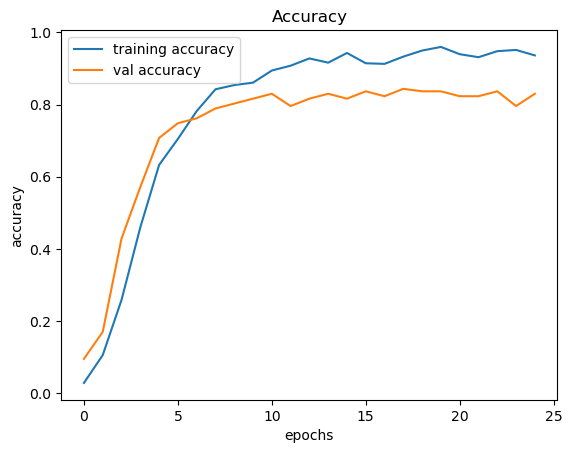

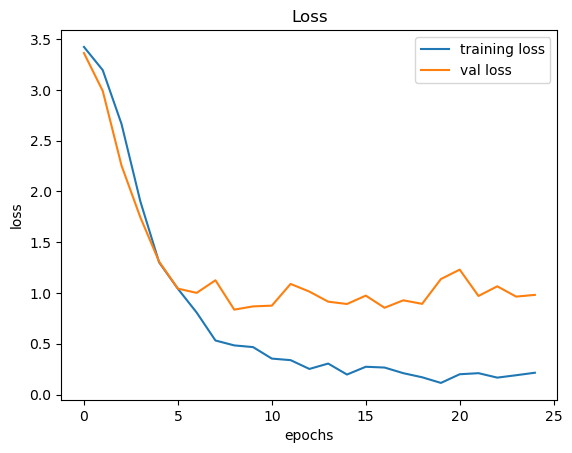

In [9]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    directory=r'C:\Users\Nivedha\Downloads\Road Signs classification dataset-20250404T035044Z-001\Road Signs classification dataset\TEST',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    classes=list(train_data.class_indices.keys())  # 🔥 Critical fix
)

# Get predictions
pred_probs = model.predict(test_data)
pred_classes = pred_probs.argmax(axis=-1)

# Get true labels
true_classes = test_data.classes

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("✅ Test Accuracy:", accuracy_score(true_classes, pred_classes))
print("\n🔍 Classification Report:\n", classification_report(true_classes, pred_classes))
print("Train class indices:")
print(train_data.class_indices)

print("\nTest class indices:")
print(test_data.class_indices)


Found 285 images belonging to 30 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
✅ Test Accuracy: 0.5403508771929825

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.67      0.33      0.44         6
           2       0.86      1.00      0.92        12
           3       0.78      0.82      0.80        22
           4       0.75      1.00      0.86         9
           5       0.31      0.91      0.47        11
           6       1.00      0.50      0.67         2
           7       0.53      0.67      0.59        15
           8       0.40      0.73      0.52        11
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00        10
          11       0.33      0.10      0.15        10
          12       0.77      1.00      0.87        10
          13       0.33      1.00      0.50         2
          14       0.80      0.50      0.62  

In [12]:
# Saving the Model
model.save('traffic_classifier.h5')